In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os.path
import os
#plt.rcParams['figure.figsize'] = [15, 3.5]

In [36]:
def gen_model(X, a, b, c, d, e):
    return a*X[:, 0] + b*X[:, 1] + c*X[:, 0]**2 + d*X[:, 1]**2 + e*X[:, 0]*X[:, 1]

def draw_heatmaps(df, labels, suptitle, filename_fig=None):
    x = df['x'].to_numpy()
    n_pts = int(np.sqrt(x.shape[0]))
    x_uniq = x[:n_pts]
    fig, axs = plt.subplots(1, len(labels), figsize=(25.0/4.0*len(labels), 4.5))
    fig.subplots_adjust(top=0.85)
    for label, ax in zip(labels, axs):
        z = df[label].to_numpy()
        z = z.reshape(n_pts, n_pts)
        c_ = ax.contourf(x_uniq, x_uniq, z, levels=10)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(label)
        plt.colorbar(c_, ax=ax)
    fig.suptitle(suptitle)

def process_csv(n, a, b, c, d, e, eps, degree, X, substitution_policy):
    filename_base = f'BMR2d_slope_n={n}_a={a:.3f}_b={b:.3f}_c={c:.3f}_d{d:.3f}_e{e:.3f}_eps={eps:.4f}_{substitution_policy}_X{X}_degree{degree}'
    filename_input_csv = f'csv/{filename_base}.csv'
    filenaout_output_fig = f'processed/{filename_base}.png'
    filenaout_output_csv = f'processed/{filename_base}.csv'
    if not os.path.exists(filename_input_csv):
        print(f'{filename_input_csv} not found. Skipping ')
        return 0
    suptitle = f'n={n}; {a}*X1 + {b}*X2 + {c}*X1^2 + {d}*X2^2 + {e}*X1X2 + N(0, {eps}); X1, X2 ~ {X}'
    df = pd.read_csv(filename_input_csv)
    df['value'] = gen_model(df[['x', 'y']].to_numpy(), a, b, c, d, e)
    df['slope1'] = a + 2*c*df[['x']].to_numpy() + e*df[['y']].to_numpy()
    df['slope2'] = b + 2*d*df[['y']].to_numpy() + e*df[['x']].to_numpy()
    df['slope1_in_CI'] = [int(x) for x in np.logical_and(df['slope1'] <= df['BMR_beta1_up'], df['slope1'] >= df['BMR_beta1_low'])]
    df['slope2_in_CI'] = [int(x) for x in np.logical_and(df['slope2'] <= df['BMR_beta2_up'], df['slope2'] >= df['BMR_beta2_low'])]
    return df

In [39]:
n=4000
a=1
b=2
c=-1
d=3
e=0.5
eps=0.3
degree=1
X='U'
df = process_csv(n, a, b, c, d, e, eps, degree, X, substitution_policy='nearest')
np.mean(df.slope1_in_CI), np.mean(df.slope2_in_CI)

(0.7578822129684711, 0.7584770969660916)

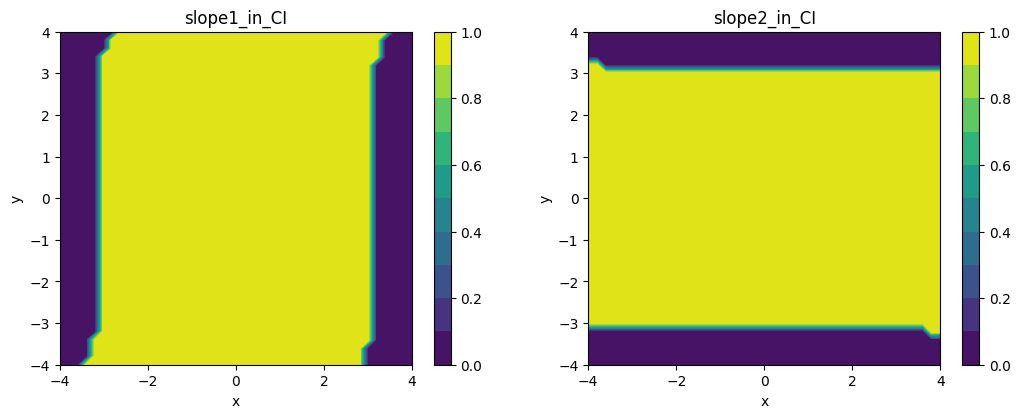

In [40]:
draw_heatmaps(df, labels=['slope1_in_CI', 'slope2_in_CI'], suptitle='')